<a href="https://colab.research.google.com/github/abriyanyusuf/data-analysis-submission/blob/main/Final_2911_Submission_Dicoding_Data_Analysist_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysist Project
Dicoding Academy - Indosat Ooredoo Digital Camp (IDCamp) 2023 - Data Science Path

Nama : Abriyan Yusuf

Pada proyek ini akan dilakukan proses analisis data. Data yang digunakan dalam proyek ini adalah [E-Commerce Public Dataset](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view)



#**Data Wrangling**


##Set Up Library and Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS

# To visualize the geographical coordinates in the world map
import folium
from folium.plugins import HeatMap

# To display all the columns in the dataframe
pd.set_option('display.max_columns', None)

##Gathering Data

In [2]:
#Download the dataset from Google Drive Link
!pip install gdown
import gdown

#url dataset
url = 'https://drive.google.com/u/0/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&export=download'

#File output name
output = 'Dataset.zip'

#Download dataset from url and showing output process (quiet=false)
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/u/0/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&export=download
To: /content/Dataset.zip
100%|██████████| 44.9M/44.9M [00:01<00:00, 33.3MB/s]


'Dataset.zip'

In [3]:
#Extract Data
import zipfile

with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [4]:
#Load E-Commerce Dataset
customers = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
geolocation = pd.read_csv('/content/E-Commerce Public Dataset/geolocation_dataset.csv')
orderItems = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
payments = pd.read_csv('/content/E-Commerce Public Dataset/order_payments_dataset.csv')
orderReviews = pd.read_csv('/content/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
products = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
sellers = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')
productCategoryTranslation = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')

##Assessing Data

###1. Assesing Customers Data

In [5]:
#Read data
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
#Assessing customers_df
# We will check datatype of each columns

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
#Checking number of missing value in each category
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
#Checking duplicate Data
print("number of duplicate data: ", customers.duplicated().sum())

number of duplicate data:  0


**Berdasarkan hasil di atas :**  
1. Terdapat 5 kategori variabel yaitu `customer_id`, `customer_unique_id`, `customer_zip_code_prefix`,`customer_city`, dan `customer_state`
2. Terdapat variabel bertipe numerik `customer_zip_code_prefix` yang seharusnya memiliki tipe data object karena menunjukkan informasi lokasi dan bukan merujuk pada bilangan jumlah tertentu.
3. Tidak ditemukan value yang terduplikasi dan missing value.

In [9]:
##Convert Datatype
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)

###2. Assesing Geolocation Data

In [10]:
#Read Data
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
##Checking Missing Value
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [13]:
##Checking Duplicated Data
print("number of duplicate data: ", geolocation.duplicated().sum())

duplicated_rows = geolocation[geolocation.duplicated()]
duplicated_rows


number of duplicate data:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Pada dataset kita ingin memeriksa apakah terdapat titik lokasi yang berada di laut. Parameter yang kita gunakan untuk memfilter data lokasi mana yang incorrect adalah berdasarkan data batas negara brazil yang kita dapatkan melalui Google Maps


In [14]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Batas-batas geografis Brazil
batas_latitude_bawah = -33.750 ##Perbatasan dengan Uruguay
batas_latitude_atas = 5.250 ##Perbatasan dengan Guyana
batas_longitude_barat = -73.990 ##Perbatasan dengan Peru
batas_longitude_timur = -34.793 ##Perbatasan dengan laut atlantik

# Membuat kondisi untuk filtering
kondisi_filter = (
    (geolocation['geolocation_lat'] < batas_latitude_bawah) |
    (geolocation['geolocation_lat'] > batas_latitude_atas) |
    (geolocation['geolocation_lng'] < batas_longitude_barat) |
    (geolocation['geolocation_lng'] > batas_longitude_timur)
)

# Melakukan filtering
lokasi_di_luar_brazil = geolocation[kondisi_filter]

##Menampilkan indeks lokasi di luar brazil
indeks_lokasi_luar_brazil = geolocation[kondisi_filter].index

# Menampilkan hasil filtering
lokasi_di_luar_brazil



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
387565,18243,28.008978,-15.536867,bom retiro da esperanca,SP
513631,28165,41.614052,-8.411675,vila nova de campos,RJ
513643,28155,-34.586422,-58.732101,santa maria,RJ
513754,28155,42.439286,13.820214,santa maria,RJ
514429,28333,38.381672,-6.328200,raposo,RJ
516682,28595,43.684961,-7.411080,portela,RJ
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES
538557,29654,21.657547,-101.466766,santo antonio do canaa,ES
585242,35179,25.995203,-98.078544,santana do paraíso,MG
585260,35179,25.995245,-98.078533,santana do paraiso,MG


In [15]:
#Menghitung Jumlah data Lokasi yang berada di luar brazil
len(indeks_lokasi_luar_brazil)

42

In [16]:
#Menampilkan indeks hasil filtering
indeks_lokasi_luar_brazil

Int64Index([387565, 513631, 513643, 513754, 514429, 516682, 538512, 538557,
            585242, 585260, 695375, 695377, 697048, 698466, 715892, 715893,
            715896, 715900, 715908, 715911, 715912, 715913, 715914, 715915,
            715916, 727755, 732362, 769333, 769351, 769391, 769436, 769489,
            769924, 770534, 822529, 860562, 860832, 865611, 965687, 992584,
            993075, 993302],
           dtype='int64')

Terdapat total 42 baris data yang berada di luar Brazil. Sebagai contoh akan diambil 4 data dari daftar di atas. Selanjutnya setelah diverifikasi melalui google maps didapatkan hasil sebagai berikut :
1. Entri nomor 538512 : San Antonio, Texas, USA (arah barat laut dari brazil). Maka data ini tidak sesuai dengan yang seharusnya yaitu geolokasi dalam negara Brazil.
2. Entri nomor 538557 :  Fraccionamiento San Antonio, Gto., Mexico (arah barat laut dari brazil). Maka data ini tidak sesuai dengan yang seharusnya yaitu geolokasi dalam negara Brazil.
3. Entri Nomor 585242 dan 585260 : Rio Bravo, Tarnaulipas, Mexico. (arah barat laut dari brazil). Maka data ini tidak sesuai dengan yang seharusnya yaitu geolokasi dalam negara Brazil.

Indeks yang didapatkan dapat selanjutnya digunakan pada proses cleaning data

Berdasarkan analisis yang dilakukan didapatkan informasi sebagai berikut :
1. Terdapat duplicate data
2. Tidak terdapat missing value
3. Terdapat data Lokasi di Luar Brazil
4. Tidak ditemukan kesalahan datatype pada setiap variabel

###3. Assesing Order Items Data

In [17]:
orderItems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Berdarkan hasil di atas `shipping_limit_date` memiliki format data yang salah. Selanjutnya variabel tersebut akan diganti format datanya menjadi datetime

In [19]:
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems.shipping_limit_date)

In [20]:
##Memeriksa Missing Value
orderItems.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
##Memeriksa duplicate data
print("Jumlah Duplicated Data:", orderItems.duplicated().sum())

Jumlah Duplicated Data: 0


###Assesing Orders Data

In [22]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terlihat bahwa beberapa variabel belum memiliki datatype yang seharusnya, diantaranya yaitu `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivered_date`. Maka akan dilakukan proses pengubahan datatype

In [24]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Terlhat bahwa datatype sudah sesuai

In [26]:
##Memeriksa Missing Value
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing value. Sebelum memutuskan tindakan selanjutnya, akan dilakukan pemeriksaan baris-baris yang memiliki missing value tersebut

In [27]:
#memeriksa Baris yang memiliki Missing Value
orders[orders.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [28]:
##memeriksa order_status dari setiap baris yang memmiliki setidaknya 1 missing value
orders[orders.isna().any(axis = 1)]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

In [29]:
##Memeriksa jumlah order_status sebelum dilakukan dropping pada baris yang memiliki missing value
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [30]:
##Memeriksa order_status setelah melakukan dropping pada baris yang memiliki
##setidaknya 1 missing value
orders.dropna()['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [31]:
##Memeriksa duplicate data
print("Jumlah Duplicated Data:", orders.duplicated().sum())

Jumlah Duplicated Data: 0


Berdasarkan analisis di atas, didapatkan informasi sebagai berikut :
1. Dalam analisis ini data pembelian pelanggan yang digunakan hanya akan menggunakan data pembelian yang statusnya `delivered` sehingga akan dilakukan penghapusan atau dropping pada data-data di luar status tersebut.
2. Tidak terdapat duplicated data pada `orders` dataframe

###Summarize of Assessing Data
| dataframe | Data Type | Missing value | Duplicated Data | Inaccurate value |
|---|---|---|---|---|
| customer_df | - |- | -| -|
| orders_df | <br>`order_purchase_timestamp` <br>`order_approved_at` <br>`order_delivered_carrier_date` <br>`order_delivered_customer_date` <br>`order_estimated_delivery_date`| <br>`order_approved_at`: 160 <br> `oder_delivered_carrier_date` : 1783 <br>`order_delivered_customer_date` : 2965 <br><br>In total there is 2980 rows contain missing value |-|-|
| product_df | - | <br>`product_category_name` : 610 <br>`product_name_lenght`: 610 <br>`product_description_lenght`: 610 <br>`product_photos_qty`: 610 <br>`product_weight_g`: 2 <br>`product_length_cm`: 2 <br>`product_height_cm`: 2 <br>`product_width_cm`: 2 <br><br> In total there is 611 rows contain missing value| - |-|
| order_item_df |`shipping_limit_date`|- | - | - |


##Cleaning Data

Based on the summary of the data assessment above, we find that the problems contained in the data are missing values and incompatible datatypes.

To handle missing values, there are several steps that can be taken, including :

1. **Dropping**, which is by deleting rows that have missing values using the `dropna(axis=0, inplace=True)` method. This method can be chosen if the dataset has a large size and it can be ensured that not much important information is wasted when performing this method.

2. **Imputation**, which is to fill in the missing value with a certain value. Missing values can be filled with values or categories that appear frequently (mode), mean, or median. This step can be done by using the `fillna(value=...., inplace=True)` method. Note that, this method can make changes to the variance of the data. So to use this method, users need to have a good background knowledge of the data.

3. **Interpolation**, which is used to calculate new data points based on an existing data range. This calculation uses a linear or polynomial equation. The calculation makes this method very suitable for handling missing values in time series data. This can be done using the `interpolate(method='line equation type', limit_direction='constructive direction of interpolation', inplace=True)` method.

##1. Cleaning Geolocation Data

In [32]:
#membersihkan incorrect data lokasi dengan melakukan dropping
print("Dimensi sebelum dropping:", geolocation.shape)
geolocation.drop(index=indeks_lokasi_luar_brazil, inplace=True)
print("Dimensi setelah dropping:", geolocation.shape)

Dimensi sebelum dropping: (1000163, 5)
Dimensi setelah dropping: (1000121, 5)


Dropping lokasi di luar brazil telah berhasil. Sekarang kita akan melakukan dropping duplicate data. Tetapi sebelum itu kita harus memeriksa ulang jumlah duplicated data

In [33]:
##Memeriksa ulang duplicated data
geolocation.duplicated().sum()

261822

In [34]:
#Membersihkan duplicated data dengan melakukan dropping
geolocation.drop_duplicates(inplace=True)
print("Jumlah Duplicated Data:", geolocation.duplicated().sum())

Jumlah Duplicated Data: 0


Proses cleaning pada geolocation data telah berhasil dilakukan

###2. Cleaning Orders Data

In [35]:
#Handling Missing Value
orders.dropna(axis=0, inplace=True)

In [36]:
#Memeriksa Ulang Missing Value
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing value berhasil teratasi

In [37]:
# Menampilkan jumlah kemunculan setiap nilai sebelum penghapusan
print("Sebelum penghapusan:")
print(orders['order_status'].value_counts())

# Menghapus baris dengan nilai 'canceled' di kolom 'order_status'
orders = orders[orders['order_status'] != 'canceled']

# Menampilkan jumlah kemunculan setiap nilai setelah penghapusan
print("\nSetelah penghapusan:")
print(orders['order_status'].value_counts())


Sebelum penghapusan:
delivered    96455
canceled         6
Name: order_status, dtype: int64

Setelah penghapusan:
delivered    96455
Name: order_status, dtype: int64


Dropping pada baris yang memiliki value order_status = `canceled` telah berhasil. Data `orders` saat ini telah berisi data-data dari order yang berstatus `delivered`. Sehingga analisis selanjutnya dapat dilakukan.

#**Exploratory Data Analysis Process**
Dalam proyek ini, digunakan dataset dari E-Commerce Public Dataset: https://drive.google.com/filed1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view.

##1. Dataset Background
E-Commerce Public Dataset terdiri dari beberapa dataset. Dalam analisis ini akan dipilih 3 dataset sebagai berikut:

**1. Customers Dataset**: Dataset ini memiliki informasi tentang pelanggan dan lokasinya terkandung dalam dataset ini. Ini digunakan untuk mengidentifikasi pelanggan unik dalam dataset pesanan dan untuk menentukan lokasi pengiriman pesanan. Setiap pesanan dialokasikan customer_id yang unik. Ini menghasilkan id yang berbeda untuk pelanggan yang sama di berbagai pesanan. Dimasukkannya customer_unique_id dalam dataset berfungsi untuk memungkinkan identifikasi pelanggan yang telah melakukan pembelian ulang di toko. Tanpa ini, setiap pesanan akan dikaitkan dengan pelanggan yang berbeda. Dataset ini terdiri dari 5 kolom:
<br>`customer_id`
<br>`customer_unique_id`
<br>`customer_zip_code_prefix`
<br>`customer_city`
<br>`customer_state`

**2. Orders Dataset**: Dataset ini adalah dataset inti yang berisi data pembelian produk. Ini berisi: <br>order_id,<br>`customer_id`,<br>`order_status`, <br>`order_purchase_timestamp`,<br>`order_approved_at`,<br>`order_delivered_carrier_date`,<br>`order_delivered_customer_date`, dan <br>`order_estimated_delivery_date.`


**3. Order_Item Dataset**: Dataset ini mencakup data tentang item yang dibeli dalam setiap pesanan. Ini berisi 7 kolom:
<br>`order-id`
<br>`order_item_id`
<br>`product_id`
<br>`seller_id`
<br>`shipping_limit_date`
<br>`price`
<br>`freight_value`




##2. Data Exploration

###2.1 Customers Data

In [38]:
##Rechecking datatype after conversion
customers.describe(include='object')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [39]:
#Menampilkan 20 Kota Teratas yang Menjadi Asal Pelanggan dalam bentuk persentase
customerCity = customers.customer_city.value_counts(normalize = True)[:20] * 100
print('20 Daftar Teratas Kota Asal Pelanggan : \n', customerCity)

20 Daftar Teratas Kota Asal Pelanggan : 
 sao paulo                15.627357
rio de janeiro            6.920687
belo horizonte            2.788588
brasilia                  2.142979
curitiba                  1.529550
campinas                  1.452117
porto alegre              1.386752
salvador                  1.251999
guarulhos                 1.195684
sao bernardo do campo     0.943273
niteroi                   0.853773
santo andre               0.801480
osasco                    0.750194
santos                    0.717008
goiania                   0.695890
sao jose dos campos       0.694884
fortaleza                 0.657676
sorocaba                  0.636558
recife                    0.616446
florianopolis             0.573204
Name: customer_city, dtype: float64


In [40]:
customerState = customers.customer_state.value_counts(normalize=True)[:20] * 100
print('20 Daftar Teratas Negara Bagian Asal Pelanggan: \n', customerState)

20 Daftar Teratas Negara Bagian Asal Pelanggan: 
 SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
PE     1.661287
CE     1.343510
PA     0.980481
MT     0.912099
MA     0.751199
MS     0.719019
PB     0.539013
PI     0.497783
RN     0.487726
AL     0.415322
Name: customer_state, dtype: float64


Berdasarkan hasil analisis di atas didapatkan informasi sebagai berikut :
1. Terdapat perbedaan jumlah unique entri antara `customer_id` yaitu sebanyak 99441 dan `customer_unique_id` yaitu sebanyak 96096. Berdasarkan informasi pada dataset, ini menunjukkan bahwa terdapat beberapa customer yang melakukan repurchase produk.
2.  Pelanggan yang ada berasal dari 14994 lokasi berdasarkan kode pos, dimana jumlah pelanggan terbanyak adalah pada kode pos 22790 dengan 142 pelanggan.
3. Pelanggan yang ada berasal dari 4119 kota dan kota Sao Paulo adalah kota dengan jumlah pelanggan tertinggi yaitu sebanyak 15540 pelanggan atau 15.627% dari total pelanggan seluruhnya.
4. Pelanggan yang ada berasal dari 27 negara bagian dimana negara bagian SP adalah negara bagian dengan total pelanggan terbanyak yaitu sebanyak 41746 atau sama dengan 41.98% dari total pelanggan.

###2.2 OrderItems Data

In [41]:
##memeriksa dekripsi kolom non numerik
orderItems.describe(exclude = np.number)

<ipython-input-41-d67fa9999e8b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orderItems.describe(exclude = np.number)


,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21
first,NaN,NaN,NaN,2016-09-19 00:15:34
last,NaN,NaN,NaN,2020-04-09 22:35:08


In [42]:
##Memeriksa deskripsi Kolom numerik
orderItems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Berdasarkan hasil di atas didapatkan informasi sebagai berikut :
1. Terdapat total 98666 pemesanan, dimana pesanan dengan jumlah item terbanyak adalah 8272b63d03f5f79c56e9e4120aec44ef yang memiliki 21 item dalam satu pesanan.
2. Total terdapat 32951 produk yang dipesan, dimana produk yang dipesan paling banyak adalah aca2eb7d00ea1a7b8ebd4e68314663af dengan total 527 kali pemesanan.
3. Terdapat total 3095 penjual produk, dimana seller yang menjual sebagian besar produk adalah 6560211a19b47992c3666cc44a7e94c0 dengan 2033 penjualan.
4. Rerata harga produk yang dipesan adalah 120.65 dan kecenderungan harga adalah right-skewed karena harga termahal untuk produk yang dipesan adalah 6735.
5. Rerata biaya pengiriman untuk setiap pesanan adalah 19.99, dimana biaya pengiriman termahal adalah 409.68.

###2.3 Orders Data

In [43]:
#Mengunakan metode copy untuk menghindary SettingWithCopywarning
orders = orders.copy()

orders['purchased_approved'] = (orders.order_approved_at - orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days


In [44]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642,2,6,7,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170,0,12,5,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994,0,9,17,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073,3,9,12,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710,0,1,9,2


Pada hasil keluaran program di atas, kolom datetime baru dibuat. Kolom-kolom tersebut adalah sebagai berikut :
1. `Purchased_approved` adalah kolom yang mewakili waktu dalam detik yang dibutuhkan untuk suatu pesanan untuk disetujui setelah pelanggan membelinya.
2. `approved_carrier` adalah kolom yang mewakili jumlah hari yang dibutuhkan untuk pesanan menuju ke perusahaan pengiriman setelah disetujui.
3. `carrier_delivered` adalah kolom yang mewakili jumlah hari yang dibutuhkan untuk pesanan sampai ke pelanggan dari tanggal pesanan sampai di perusahaan pengiriman untuk dikirimkan.
4. `Delivered_estimated` adalah kolom yang mewakili selisih tanggal antara tanggal perkiraan pengiriman dan tanggal pengiriman aktual.
5. `Purchased_delivered` adalah kolom yang mewakili jumlah hari yang dibutuhkan untuk pesanan sampai ke pelanggan dari tanggal pelanggan melakukan pembelian.

In [45]:
##Menampilkan deskripsi statistik variabel numeris
orders.describe(include = np.number)

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,96455.000000,96455.000000,96455.000000,96455.000000,96455.000000
mean,14158.883987,2.295672,8.878140,10.874584,12.093100
std,23628.952974,3.548012,8.746466,10.181726,9.551209
min,0.000000,-172.000000,-17.000000,-189.000000,0.000000
25%,756.000000,0.000000,4.000000,6.000000,6.000000
50%,1169.000000,1.000000,7.000000,11.000000,10.000000
75%,16976.500000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


Pada hasil di atas terlihat bahwa nilai minimum pada setiap variabel ada yang bernilai 0 bahkan ada yang bernilai negatif atau kurang dari nol. Berdasarkan informasi nilai minimum tersebut, dapat dipahami bahwa :
1. Pada `purchased_approved` nilai minimum bernilai 0 menandakan bahwa pesanan seketika disetujui di waktu yang sama ketika pelanggan memesan produk.
2. Pada `approved_carrier` nilai minimum bernilai negatif menandakan bahwa pesanan sampai terlebih dahulu di perusahaan pengiriman sebelum disetujui. Sehingga data seperti ini dapat diindikasikan sebagai data yang palsu atau tidak valid dan harus dihapus.
3. Pada `carrier_delivered` nilai minimum bernilai negatif menandakan bahwa pesanan dikirimkan terlebih dahulu oleh perusahaan pengiriman ke konsumen padahal pesanan tersebut belum diserahkan ke perusahaan pengiriman. Ini menandakan bahwa data tersebut palsu atau invalid sehingga harus dihapus.
4. Pada `delivered_estimated` nilai minimum yang bernilai negatif menandakan bahwa pesanan dikirimkan melebihi estimasi waktu pengiriman yang telah ditetapkan.
5. Pada `purchased_delivered` nilai minimum yang bernilai nol menandakan bahwa pesanan seketika dikirimkan kepada customer setelah customer melakukan pemesanan. Data ini tidak logis, sehingga akan dihapus.


In [46]:
##Menghapus data yang memiliki invalid value pada approved_carrier
invalid_approved_carrier = orders[orders.approved_carrier < 0].index
orders.drop(index = invalid_approved_carrier, inplace = True)

In [47]:
##Menghapus data yang memiliki invalid value pada carrier_delivered
invalid_carrier_delivered = orders[orders.carrier_delivered < 0].index
orders.drop(index = invalid_carrier_delivered, inplace = True)

In [48]:
##Menghapus data yang memiliki invalid value pada carrier_delivered
invalid_purchased_delivered = orders[orders.purchased_delivered == 0].index
orders.drop(index = invalid_purchased_delivered, inplace = True)

In [49]:
##Menampilkan deskripsi statistik variabel numeris
orders.describe(include = np.number)

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,95071.000000,95071.000000,95071.000000,95071.000000,95071.000000
mean,13908.846609,2.351853,8.911350,10.823858,12.154264
std,23447.380629,3.490740,8.755797,10.199221,9.576875
min,0.000000,0.000000,0.000000,-189.000000,1.000000
25%,753.000000,0.000000,4.000000,6.000000,6.000000
50%,1153.000000,1.000000,7.000000,11.000000,10.000000
75%,15506.000000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


Data yang ada telah berhasil disesuaikan

###2.4 Geolocation

Karena ada banyak koordinat geografis yang diberikan untuk satu kode pos geolokasi, maka akan digunakan nilai maksimum koordinat untuk kode pos tertentu.

In [50]:
geolocation_Mean = geolocation.groupby('geolocation_zip_code_prefix', as_index = False).agg({'geolocation_lat'  : 'max',
                                                                                            'geolocation_lng'  : 'max'})
geolocation_Mean.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1002,-23.544641,-46.633180
2,1003,-23.548901,-46.634862
3,1004,-23.549181,-46.634057
4,1005,-23.548758,-46.634768


##3. RFM Analysis


Dikutip dari [Techtarget](https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis), Analisis RFM adalah teknik pemasaran yang digunakan untuk memberi peringkat dan mengelompokkan pelanggan secara kuantitatif berdasarkan frekuensi dan total moneter dari transaksi terakhir mereka untuk mengidentifikasi pelanggan terbaik dan melakukan kampanye pemasaran yang ditargetkan. Sistem memberikan skor numerik kepada setiap pelanggan berdasarkan faktor-faktor ini untuk memberikan analisis yang objektif. Analisis RFM didasarkan pada pepatah pemasaran bahwa "80% bisnis Anda berasal dari 20% pelanggan Anda."

Analisis RFM memberi peringkat kepada setiap pelanggan berdasarkan faktor-faktor berikut:

1. **Recency**. *Seberapa baru pembelian terakhir pelanggan?* Pelanggan yang baru saja melakukan pembelian masih akan mengingat produk tersebut dan lebih mungkin untuk membeli atau menggunakan produk tersebut lagi. Bisnis sering kali mengukur kemutakhiran dalam hitungan hari. Namun, tergantung pada produknya, mereka dapat mengukurnya dalam hitungan tahun, minggu, atau bahkan jam.

2. **Frequency**. *Seberapa sering pelanggan ini melakukan pembelian dalam periode tertentu?* Pelanggan yang sering membeli sekali lebih mungkin untuk membeli lagi. Selain itu, pelanggan yang baru pertama kali membeli dapat menjadi target yang baik untuk iklan tindak lanjut untuk mengubah mereka menjadi pelanggan yang lebih sering.

3. **Monetary**. *Berapa banyak uang yang dibelanjakan pelanggan dalam periode tertentu?* Pelanggan yang menghabiskan banyak uang lebih mungkin untuk menghabiskan uang di masa depan dan memiliki nilai yang tinggi untuk bisnis.



In [51]:
##Menggabungkan seluruh dataframe individual sebelum melakuka proses analisis RFM
merged_df = customers.merge(orders, on = 'customer_id').merge(orderItems, on = 'order_id').merge(products, on = 'product_id').merge(geolocation_Mean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix').merge(payments, on = 'order_id').merge(sellers, on = 'seller_id').merge(productCategoryTranslation, on = 'product_category_name').merge(orderReviews, on = 'order_id', how = 'left')

In [52]:
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,997,6,1,10,8,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,14409,-20.468849,-47.382173,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,86255,12,5,20,18,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,68030,-2.430314,-54.693217,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,86255,12,5,20,18,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,68030,-2.430314,-54.693217,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,7890,10,6,16,18,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,92480,-29.826454,-51.245676,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,9819,14,9,21,25,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,25931,-22.604835,-43.026500,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24


In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112085 entries, 0 to 112084
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112085 non-null  object        
 1   customer_unique_id             112085 non-null  object        
 2   customer_zip_code_prefix       112085 non-null  object        
 3   customer_city                  112085 non-null  object        
 4   customer_state                 112085 non-null  object        
 5   order_id                       112085 non-null  object        
 6   order_status                   112085 non-null  object        
 7   order_purchase_timestamp       112085 non-null  datetime64[ns]
 8   order_approved_at              112085 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112085 non-null  datetime64[ns]
 10  order_delivered_customer_date  112085 non-null  datetime64[ns]
 11  

In [54]:
merged_df.to_csv("merged_df.csv")

###3.1 Recency

In [55]:
##Menampilkan total customer_unique_id setiap customer_id
result = merged_df.groupby('customer_unique_id')['order_id'].count().reset_index()
print(result)

                     customer_unique_id  order_id
0      0000366f3b9a7992bf8c76cfdf3221e2         1
1      0000b849f77a49e4a4ce2b2a4ca5be3f         1
2      0000f46a3911fa3c0805444483337064         1
3      0000f6ccb0745a6a4b88665a16c9f078         1
4      0004aac84e0df4da2b147fca70cf8255         1
...                                 ...       ...
90491  fffcf5a5ff07b0908bd4e2dbc735a684         2
90492  fffea47cd6d3cc0a88bd621562a9d061         1
90493  ffff371b4d645b6ecea244b27531430a         1
90494  ffff5962728ec6157033ef9805bacc48         1
90495  ffffd2657e2aad2907e67c3e9daecbeb         1

[90496 rows x 2 columns]


In [56]:
# Mengurutkan data
sorted_result = result.sort_values(by='order_id', ascending=False)
print(sorted_result)

                     customer_unique_id  order_id
54602  9a736b248f67d166d2fbb006bcb877c3        75
39537  6fbc7cdadbb522125f4b27ae9dee4060        38
88314  f9ae226291893fda10af7965268fb7f6        35
30703  569aa12b73b5f7edeaa6f2a01603e381        26
10390  1d2435aa3b858d45c707c9fc25e18779        24
...                                 ...       ...
32525  5ba572c778c07ea0ce0acc8bdda8d263         1
32524  5ba545232dc83d378e08162493ce08b1         1
32523  5ba506364a0106b979abf923322e28b7         1
32522  5ba4a353f2e66822e7e74359ebf8d071         1
90495  ffffd2657e2aad2907e67c3e9daecbeb         1

[90496 rows x 2 columns]


In [57]:
##Menampilkan data yang berisi pembelian terakhir setiap pelanggan
recency = merged_df.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

,customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [58]:
##Menampilkan tanggal pembelian terbaru (recent_date) dalam dataset yang digabungkan
recent_date = merged_df['order_purchase_timestamp'].dt.date.max()
print('Tanggal terbaru pembelian dalam set data yang tersedia adalah: ', recent_date)

Tanggal terbaru pembelian dalam set data yang tersedia adalah:  2018-08-29


Selanjutnya akan dihitung skor recency. Skor recency dapat dihitung dengan menggunakan metode pada gambar berikut ini.

![Perhitungan Skor Recency](https://blog.rsquaredacademy.com/img/rfm_recency_computation.png)

In [59]:
##Menampilkan data skor recency pelanggan
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)

# Mengurutkan data berdasarkan skor recency dari tinggi ke rendah
sorted_recency = recency.sort_values(by='Recency', ascending=False)

print(sorted_recency)

                     customer_unique_id    LastPurchaseDate  Recency
34707  61db744d2f835035a5625b59350c6b63 2016-10-03 21:13:36      695
16839  2f64e403852e6893ae37485d5fcacdaf 2016-10-03 16:56:50      695
49804  8d3a54507421dbd2ce0a1d58046826e0 2016-10-03 22:06:03      695
40905  7390ed59fa1febbfda31a80b4318c8cb 2016-10-03 22:44:10      695
6037   10e89fd8e5c745f81bec101207ba4d7d 2016-10-03 22:51:30      695
...                                 ...                 ...      ...
1463   0421e7a23f21e5d54efed456aedbc513 2018-08-29 11:06:11        0
43184  7a22d14aa3c3599238509ddca4b93b01 2018-08-29 12:25:59        0
32778  5c58de6fb80e93396e2f35642666b693 2018-08-29 14:18:23        0
64004  b4dcade04bc548b7e3b0243c801f8c26 2018-08-29 09:14:11        0
4454   0c6d7218d5f3fa14514fd29865269993 2018-08-29 09:48:09        0

[90496 rows x 3 columns]


In [60]:
recency.describe()

,Recency
count,90496.000000
mean,238.699688
std,152.350278
min,0.000000
25%,115.000000
50%,220.000000
75%,347.000000
max,695.000000


Didapatkan skor rerata recency adalah 238 hari. Artinya, pada rata-rata, pelanggan melakukan pembelian mereka sekitar 240 hari yang lalu.

###3.2 Frequency

In [61]:
frequency = merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [62]:
# Mengurutkan data berdasarkan frequency dari tinggi ke rendah
sorted_frequency = frequency.sort_values(by='Frequency', ascending=False)

print(sorted_frequency)

                     customer_unique_id  Frequency
49832  8d50f5eadf50201ccdcedfb9e2ac8455         14
22102  3e43e6105506432c953e165fb2acf44c          9
9758   1b6c7548a2a1f9037c1fd3ddfed95f33          7
71634  ca77025e7201e3b30c44b472ff346268          7
35566  6469f99c1f9dfae7733b25662e7f1782          7
...                                 ...        ...
30584  564935b7af878f03c1b137d326c005fd          1
30583  5648f8f7714f3075cc26b46aaf6ba839          1
30582  5648b6872b227b3665ac1172f7eeb205          1
30581  56486fa3077e8eb22d0449b52887b0e7          1
90495  ffffd2657e2aad2907e67c3e9daecbeb          1

[90496 rows x 2 columns]


In [63]:
frequency.describe()

,Frequency
count,90496.000000
mean,1.032896
std,0.206504
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14.000000


Berdasarkan hasil tersebut, rerata pelanggan melakukan pembelian produk sebanyak 1.03 kali.

###3.3 Monetary

Monetary dihitung dengan menjumlahkan semua nilai transaksi untuk masing-masing customer.

In [64]:
monetary = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [65]:
# Mengurutkan data berdasarkan monetary dari tinggi ke rendah
sorted_monetary = monetary.sort_values(by='Monetary', ascending=False)

print(sorted_monetary)

                     customer_unique_id   Monetary
3615   0a0a92112bd4c708ca5fde585afaa872  109312.64
37372  698e1cf81d01a3d389d96145f7fa6df8   45256.00
69352  c402f431464c72e27330a67f7b94d4fb   44048.00
22714  4007669dec559734d6f53e029e360987   36489.24
84762  ef8d54b3797ea4db1d63f0ced6a906e9   30186.00
...                                 ...        ...
39411  6f5b9d1cdccc4d28f0483a612edecacf      11.63
14358  2878e5b88167faab17d4fb83a986d38b      11.63
63435  b33336f46234b24a613ad9064d13106d      10.89
66885  bd06ce0e06ad77a7f681f1a4960a3cc6      10.07
17555  317cfc692e3f86c45c95697c61c853a6       9.59

[90496 rows x 2 columns]


In [66]:
monetary.describe()

,Monetary
count,90496.000000
mean,213.355080
std,651.646053
min,9.590000
25%,63.830000
50%,112.985000
75%,203.082500
max,109312.640000


Berdasarkan data di atas, rerata nilai total transaksi tiap pelanggan adalah 213.35 Real Brasil

###Analisis Hasil RFM

In [67]:
##Mengagabungkan Recency, Frequency, dan Monetary
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [68]:
# Mengurutkan data berdasarkan recency dari rendah ke tinggi
sorted_RFM = rfm.sort_values(by='Recency', ascending=True)

print(sorted_RFM)

                     customer_unique_id  Recency  Frequency  Monetary
45268  7febafa06d9d8f232a900a2937f04338        0          1     61.29
62229  afbcfd0b9c5233e7ccc73428526fbb52        0          1   2486.25
4454   0c6d7218d5f3fa14514fd29865269993        0          1    178.25
64004  b4dcade04bc548b7e3b0243c801f8c26        0          1    106.95
32778  5c58de6fb80e93396e2f35642666b693        0          1   1021.92
...                                 ...      ...        ...       ...
34707  61db744d2f835035a5625b59350c6b63      695          1     53.73
47870  87776adb449c551e74c13fc34f036105      695          1     40.95
6037   10e89fd8e5c745f81bec101207ba4d7d      695          1     92.27
16839  2f64e403852e6893ae37485d5fcacdaf      695          1     39.09
40905  7390ed59fa1febbfda31a80b4318c8cb      695          1    154.57

[90496 rows x 4 columns]


In [69]:
# Menghitung jumlah data dengan nilai Recency 0
sum_recency_0 = sorted_RFM[sorted_RFM['Recency'] == 0].shape[0]

# Menampilkan hasil
print("Jumlah data dengan nilai Recency 0:", sum_recency_0)

Jumlah data dengan nilai Recency 0: 11


Terlihat bahwa terdapat nilai recency yang bernilai nol. Ini mengindikasikan bahwa customer customer melakukan pembelian pada recent_date yang ditetapkan sebagai threshold perhitungan recency skor. Sehingga, untuk menghindari masalah pada analisis lanjutan, maka akan dilakukan penghapusan data yang memiliki recency skor 0 yaitu sebanyak 11 data.

In [70]:
# Mengidentifikasi indeks baris dengan skor recency 0
indeks_recency_0 = rfm[rfm['Recency'] == 0].index

# Menghapus baris dengan skor recency 0
rfm.drop(index=indeks_recency_0, inplace=True)

In [71]:
# Menghitung jumlah data dengan nilai Recency 0
sum_recency_0 = rfm[rfm['Recency'] == 0].shape[0]

# Menampilkan hasil
print("Jumlah data dengan nilai Recency 0:", sum_recency_0)

Jumlah data dengan nilai Recency 0: 0


Data yang memiliki nilai recency 0 telah berhasil dihapus.

#**Data Visualization**


##1. Customers Data

###1.1. Visualisasi 20 Daftar Teratas Kota Asal Pelanggan

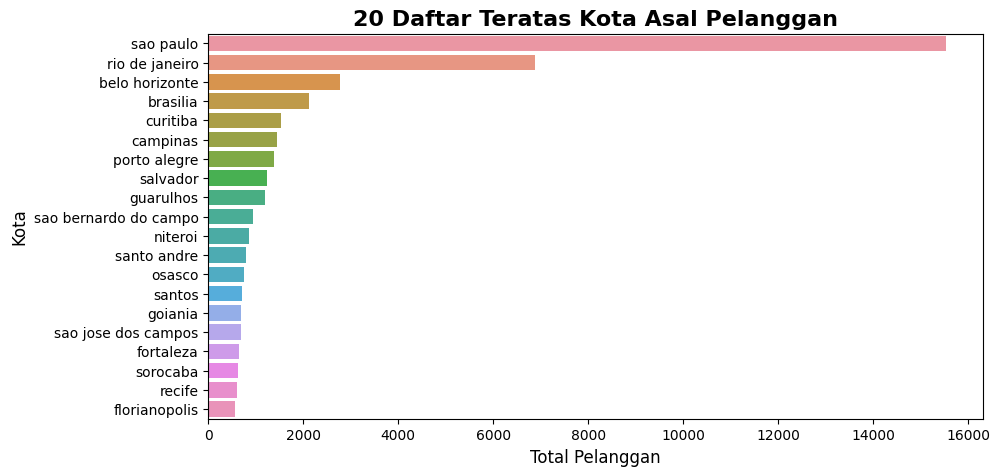

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_city.value_counts().index[:20],
x = customers.customer_city.value_counts().values[:20])

plt.xlabel('Total Pelanggan', color='black', fontsize=12)
plt.ylabel('Kota', color='black', fontsize=12)
plt.title('20 Daftar Teratas Kota Asal Pelanggan', color='black', fontsize=16, fontweight='bold')
plt.show()

###1.2. Visualisasi 20 Daftar Teratas Negara Bagian Asal Pelanggan

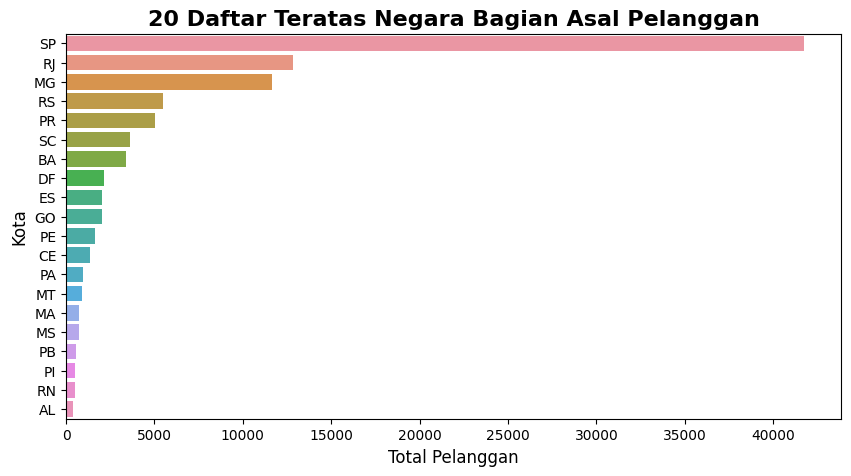

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_state.value_counts().index[:20],
x = customers.customer_state.value_counts().values[:20])

plt.xlabel('Total Pelanggan', color='black', fontsize=12)
plt.ylabel('Kota', color='black', fontsize=12)
plt.title('20 Daftar Teratas Negara Bagian Asal Pelanggan', color='black', fontsize=16, fontweight='bold')
plt.show()

In [74]:
customers.to_csv("customers.csv")

###1.3 Visualisasi Lokasi Asal Customer Menggunakan Map

In [75]:
other_state_geolocation = geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [76]:
geolocation_silver = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [77]:
customers_silver = customers.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [78]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674


In [79]:
customers_silver.to_csv("geolocation.csv", index=False)

In [80]:
import matplotlib.image as mpimg
import urllib
def plot_brazil_map(data, map_title="Brazil Map"):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.title(map_title)
    plt.show()

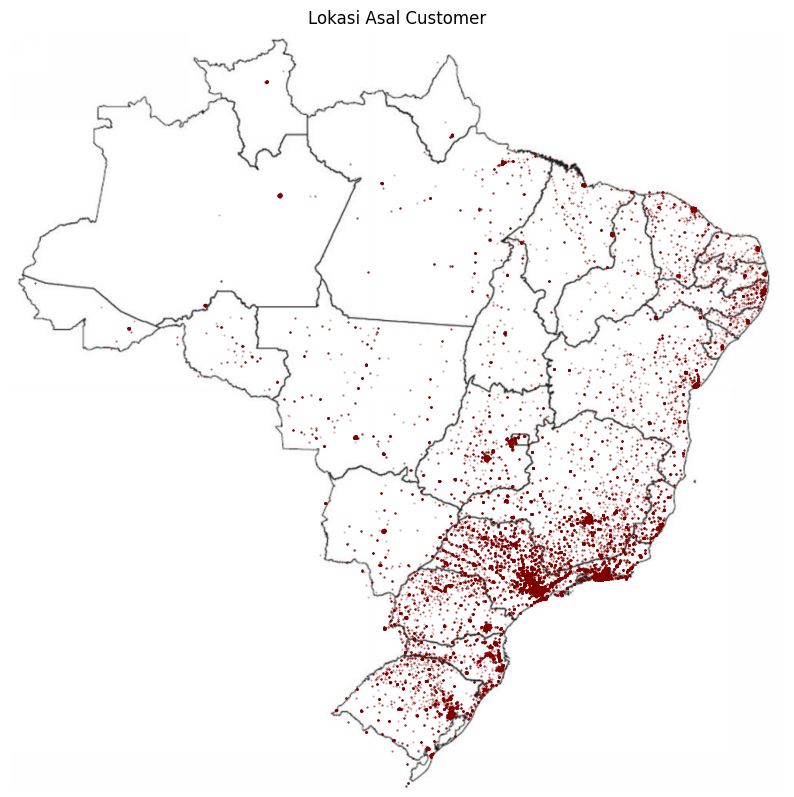

In [81]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'), map_title="Lokasi Asal Customer")

##2. Order Item Data

###2.1 Visualisasi Pesanan Teratas dengan Total Harga Tertinggi

In [82]:
orderItems.to_csv("orderItems.csv")

In [83]:
Top_Order = orderItems.groupby('order_id', as_index = False).agg({'price' : 'sum', 'freight_value':'sum'})
Top_Order['total_price'] = Top_Order.price + Top_Order.freight_value
Top_50_Order = Top_Order.sort_values(by = 'total_price', ascending = False)[:50]

#Menampilkan Daftar 50 Teratas Produk yang paling banyak dipesan
Top_50_Order

,order_id,price,freight_value,total_price
1455,03caa2c082116e1d31e67e9ae3700499,13440.00,224.08,13664.08
44467,736e1922ae60d0d6a89247b851902527,7160.00,114.88,7274.88
3130,0812eb902a67711a1cb742b3cdaa65ae,6735.00,194.31,6929.31
98298,fefacc66af859508bf1a7934eab1e97f,6729.00,193.21,6922.21
94439,f5136e38d1a14a4dbd87dff67da82701,6499.00,227.66,6726.66
17114,2cc9089445046817a7539d90805e6e5a,5934.60,146.94,6081.54
65046,a96610ab360d42a2e5335a3998b4718a,4799.00,151.34,4950.34
69531,b4c4b76c642808cbe472a32b86cddc95,4599.90,209.54,4809.44
9868,199af31afc78c699f0dbf71fb178d4d4,4690.00,74.34,4764.34
54353,8dbc85d1447242f3b127dda390d56e19,4590.00,91.78,4681.78


In [84]:
Top_Order.describe()

,price,freight_value,total_price
count,98666.000000,98666.000000,98666.000000
mean,137.754076,22.823562,160.577638
std,210.645145,21.650909,220.466087
min,0.850000,0.000000,9.590000
25%,45.900000,13.850000,61.980000
50%,86.900000,17.170000,105.290000
75%,149.900000,24.040000,176.870000
max,13440.000000,1794.960000,13664.080000


In [85]:
Top_Order['total_price'].sum()

15843553.24

In [86]:
Top_Order.to_csv("Top_Order.csv")

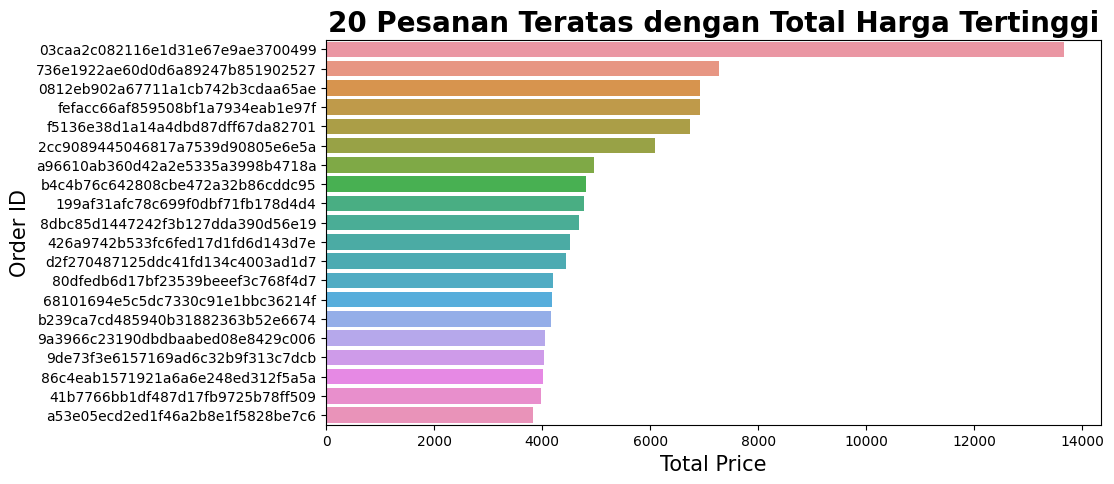

In [87]:
# Membuat bar plot dengan Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x = Top_50_Order.total_price[:20], y = Top_50_Order.order_id[:20] )
plt.xlabel('Total Price',color='black',fontsize=15)
plt.ylabel('Order ID', color='black',fontsize=15)
plt.title('20 Pesanan Teratas dengan Total Harga Tertinggi',color='black',fontsize=20,fontweight='bold')
plt.show()

###2.2 Visualisasi Seller dengan Penjualan Terbanyak

In [88]:
##Menghitung Frekuensi Seller yang melakukan penjualan
Top_Seller = orderItems.seller_id.value_counts()
Top_Seller.head()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [89]:
##Membuat dataframe frekuensi seller yang melakukan penjualan
Top_Seller = pd.DataFrame({'seller_id'  : Top_Seller.index,
                           'instances'  : Top_Seller.values})
Top_Seller.head()

,seller_id,instances
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551


Selanjutnya, data seller_id tersebut akan digabungkan dengan data geolocation masing-masing seller. Terlebih dahulu, data akan dikelompokkan dalam dataframe `geolocation` berdasarkan kolom `geolocation_zip_code_prefix`. Kemudian, data tersebut diagregasi dengan mengambil nilai maksimum `max` dari kolom `geolocation_lat`  dan `geolocation_lng`. Hasilnya akan disimpan dalam DataFrame baru bernama `geolocation_Mean`.

In [90]:
##Menggabungkan Dataframe Seller dengan Geolocation
Top_Seller_of_Order = Top_Seller.merge(sellers, on ='seller_id').merge(geolocation_Mean, left_on
                                                                       = 'seller_zip_code_prefix',
                                                                       right_on = 'geolocation_zip_code_prefix').drop(
                                                                          columns = ['geolocation_zip_code_prefix'], axis = 1).sort_values('instances', ascending = False)
Top_Seller_of_Order.head()

,seller_id,instances,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,6560211a19b47992c3666cc44a7e94c0,2033,5849,sao paulo,SP,-23.649432,-46.753466
2,4a3ca9315b744ce9f8e9374361493884,1987,14940,ibitinga,SP,-21.734663,-48.809349
51,1f50f920176fa81dab994f9023523100,1931,15025,sao jose do rio preto,SP,-20.793902,-49.376768
55,cc419e0650a3c5ba77189a1882b7556a,1775,9015,santo andre,SP,-23.653394,-46.513267
58,da8622b14eb17ae2831f4ac5b9dab84a,1551,13405,piracicaba,SP,-22.692313,-47.653256


In [91]:
Top_Seller.to_csv("Top_Seller.csv")

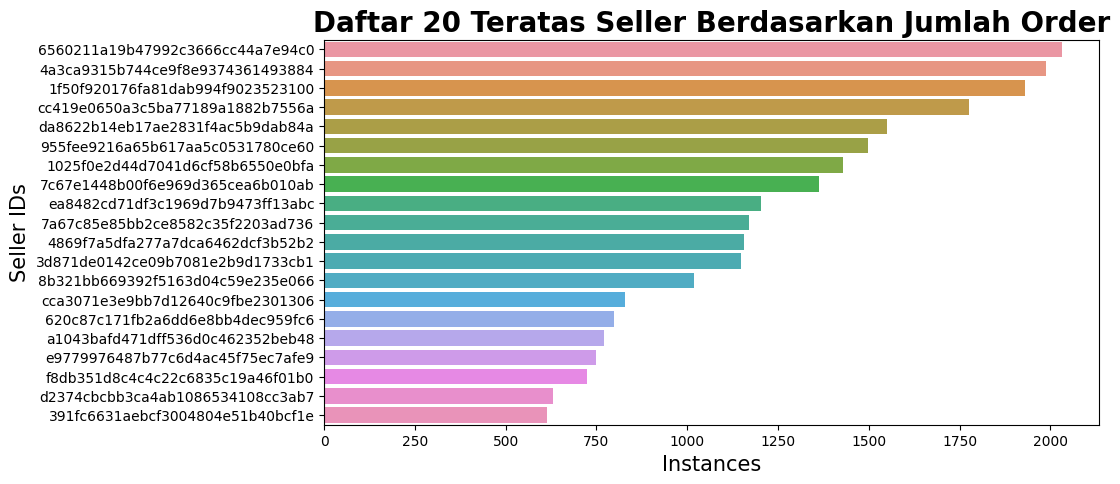

In [92]:
plt.figure(figsize=(10, 5))
sns.barplot(x = Top_Seller.instances[:20], y = Top_Seller.seller_id[:20])
plt.xlabel('Instances',color='black',fontsize=15)
plt.ylabel('Seller IDs',color='black',fontsize=15)
plt.title('Daftar 20 Teratas Seller Berdasarkan Jumlah Order',color='black',fontsize=20,fontweight='bold')
plt.show()

In [93]:
Top_Seller_of_Order.to_csv("Top_Seller_of_Order.csv")

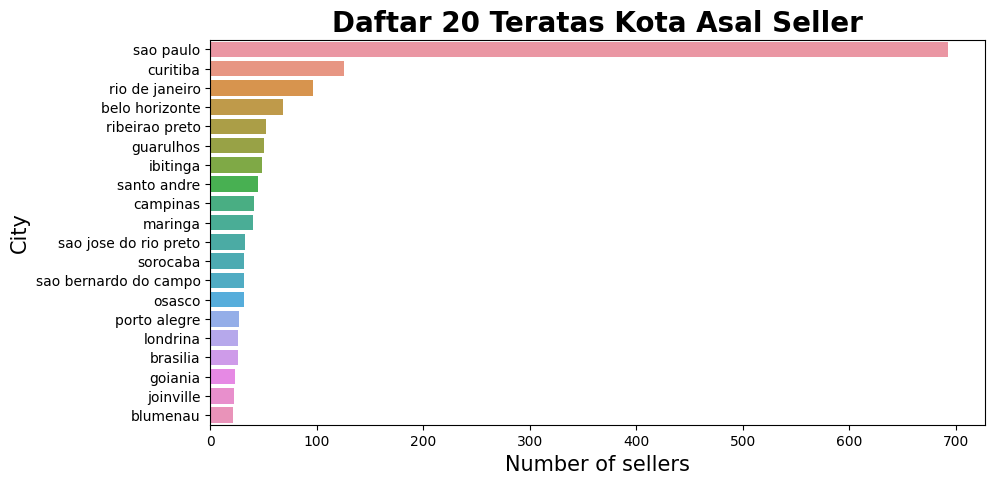

In [94]:
plt.figure(figsize=(10, 5))
sns.barplot(y = Top_Seller_of_Order.seller_city.value_counts().index[:20], x = Top_Seller_of_Order.seller_city.value_counts().values[:20])
plt.xlabel('Number of sellers',color='black',fontsize=15)
plt.ylabel('City',color='black',fontsize=15)
plt.title('Daftar 20 Teratas Kota Asal Seller',color='black',fontsize=20,fontweight='bold')
plt.show()

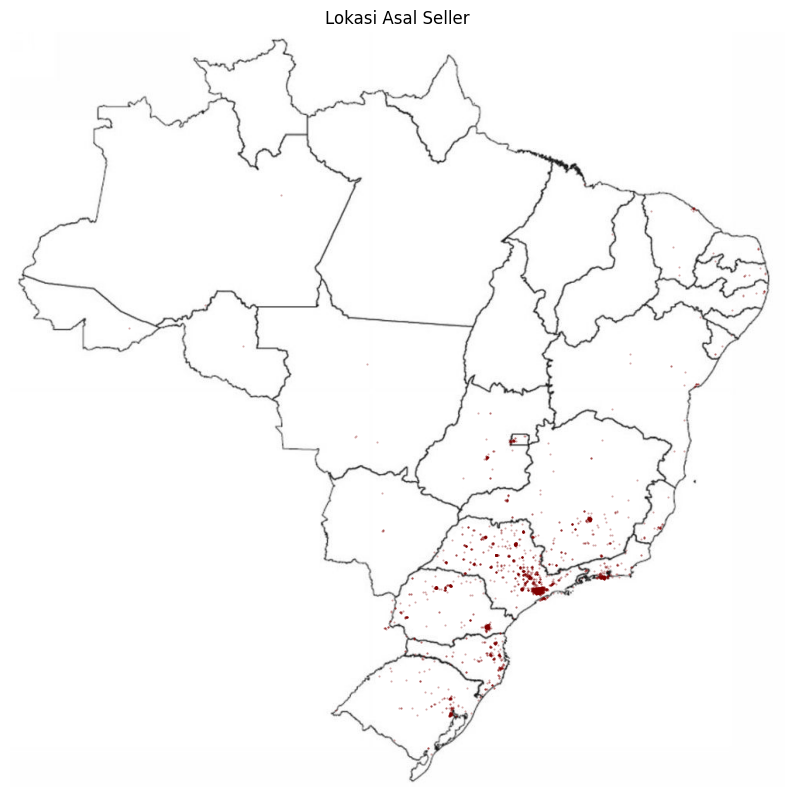

In [95]:
plot_brazil_map(Top_Seller_of_Order, map_title="Lokasi Asal Seller")

##3. Orders Data

###3.1 Visualisasi Distribusi Waktu yang Dibutuhkan untuk Pesanan Disetujui

In [96]:
orders.purchased_approved.describe()

count    95071.000000
mean     13908.846609
std      23447.380629
min          0.000000
25%        753.000000
50%       1153.000000
75%      15506.000000
max      86399.000000
Name: purchased_approved, dtype: float64

In [97]:
orders.to_csv("orders.csv")

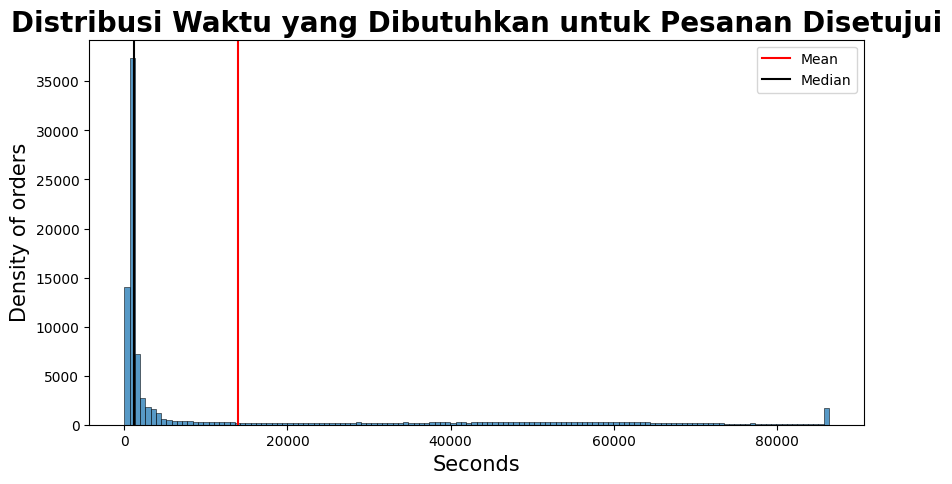

In [98]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_approved', data=orders)
plt.title('Distribusi Waktu yang Dibutuhkan untuk Pesanan Disetujui',fontweight='bold',fontsize=20)
plt.axvline(orders.purchased_approved.mean(), c='red', label='Mean')
plt.axvline(orders.purchased_approved.median(), c='black', label='Median')
plt.xlabel('Seconds',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.legend()
plt.show()

###3.2 Visualisasi Distribusi Waktu yang Dibutuhkan Agar Pesanan Dikirimkan

In [99]:
orders.purchased_delivered.describe()

count    95071.000000
mean        12.154264
std          9.576875
min          1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: purchased_delivered, dtype: float64

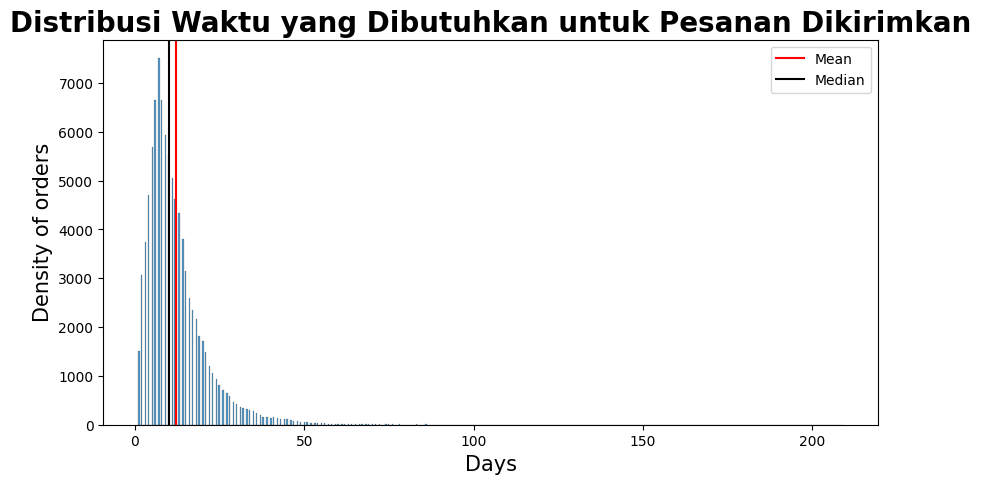

In [100]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_delivered', data=orders)
plt.title('Distribusi Waktu yang Dibutuhkan untuk Pesanan Dikirimkan',fontweight='bold',fontsize=20)
plt.axvline(orders.purchased_delivered.mean(), c='red', label='Mean')
plt.axvline(orders.purchased_delivered.median(), c='black', label='Median')
plt.xlabel('Days',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.legend()
plt.show()

##4. RFM

###4.1 Visualisasi Distribusi Recency

<ipython-input-101-da63b983f9bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Recency, kde=True)


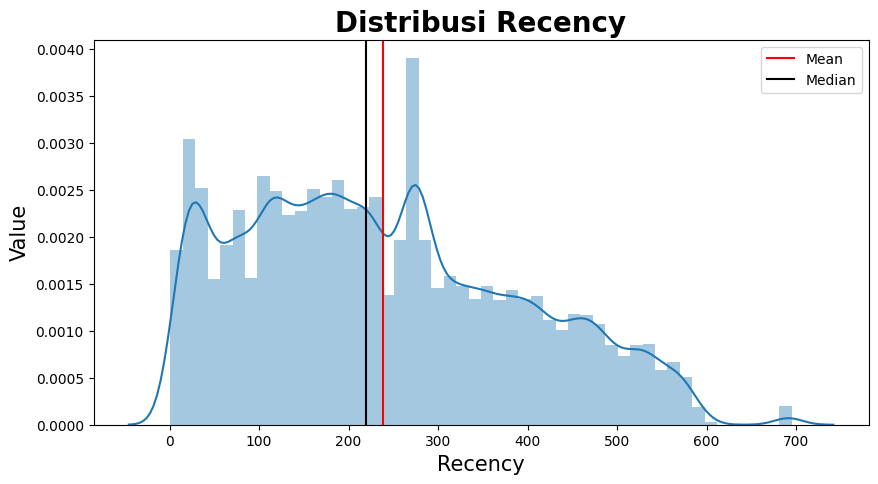

In [101]:
plt.figure(figsize=(10, 5))
sns.distplot(rfm.Recency, kde=True)
plt.axvline(rfm.Recency.mean(), c='red', label='Mean')
plt.axvline(rfm.Recency.median(), c='black', label='Median')
plt.title('Distribusi Recency', fontweight='bold', fontsize=20)
plt.xlabel('Recency', fontsize=15, color='black')
plt.ylabel('Value', fontsize=15, color='black')
plt.legend()  # Menampilkan legenda
plt.show()

###4.2 Distribusi Frekuensi

<ipython-input-102-33a4656c3326>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Frequency)


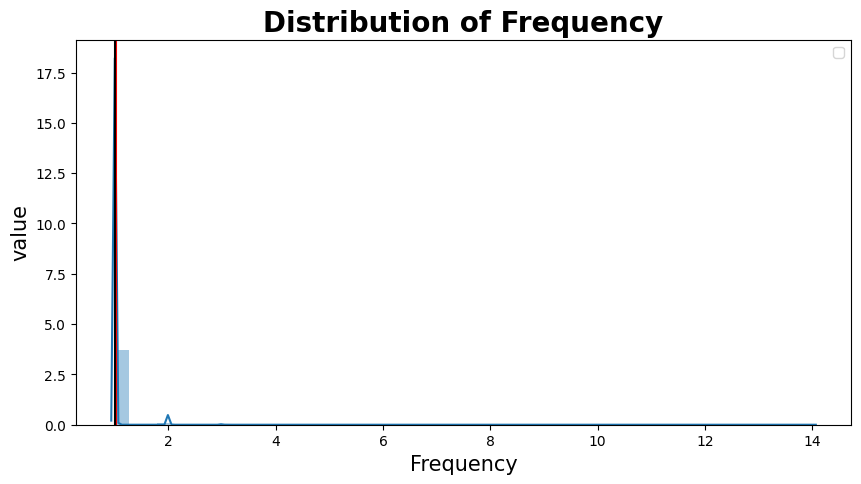

In [102]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.legend()  # Menampilkan legenda
plt.show()

###4.3 Distribusi Monetary

<ipython-input-103-c707463fbcda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Monetary)


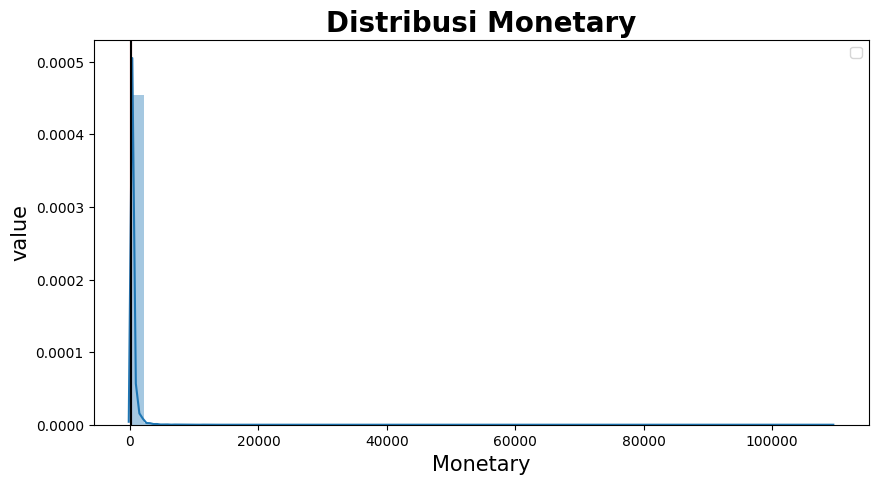

In [103]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribusi Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.legend()  # Menampilkan legenda
plt.show()

In [104]:
rfm.to_csv("rfm.csv")

###4.4 Best Customer Based on RFM


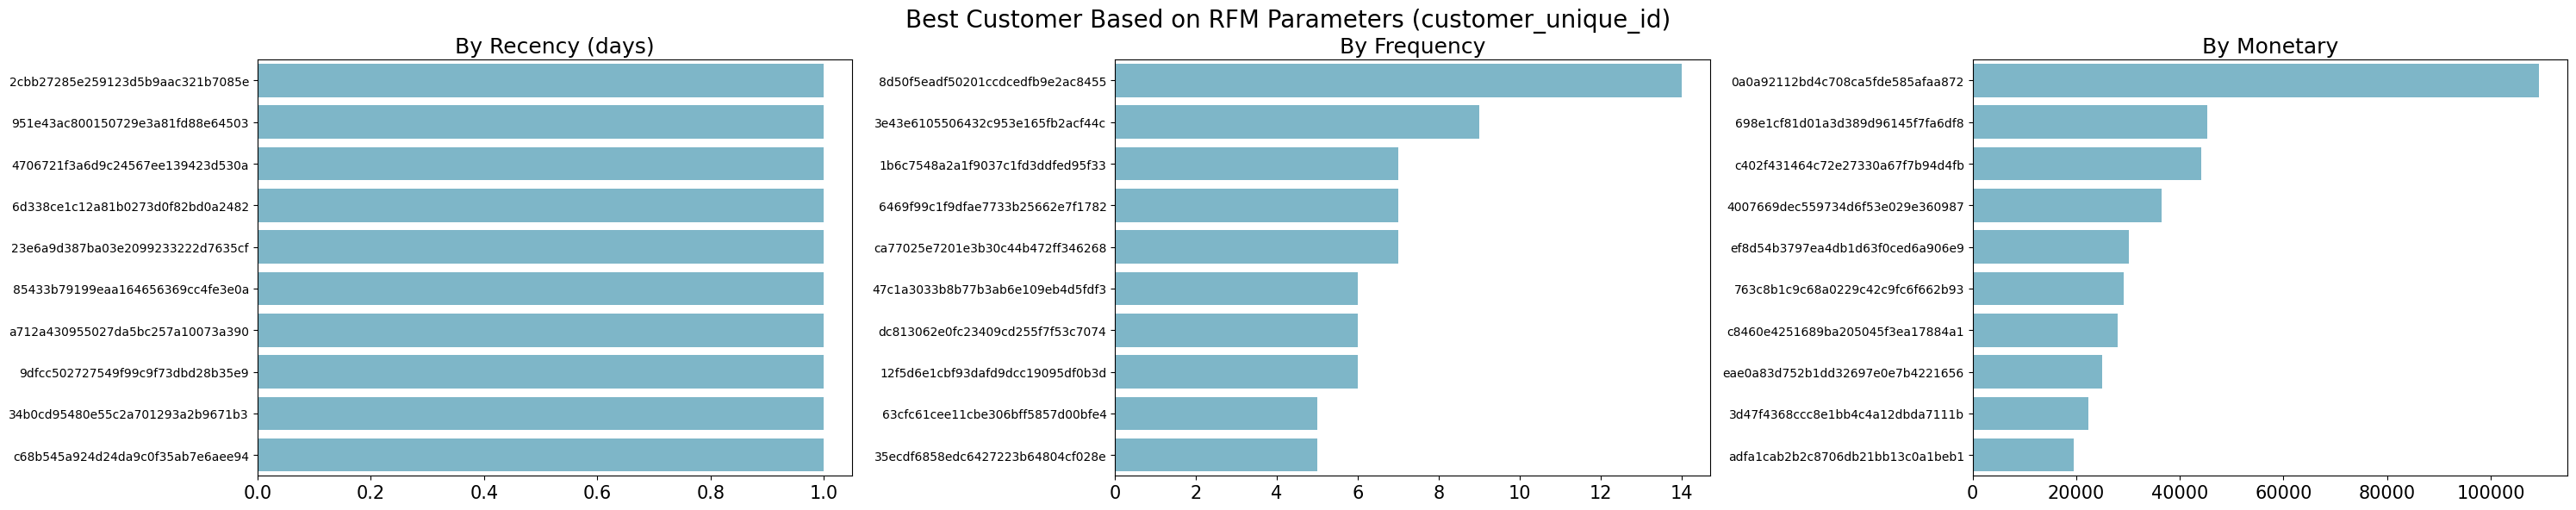

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="Recency", y="customer_unique_id", data=rfm.sort_values(by="Recency", ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(x="Frequency", y="customer_unique_id", data=rfm.sort_values(by="Frequency", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(x="Monetary", y="customer_unique_id", data=rfm.sort_values(by="Monetary", ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Adjust layout to prevent overlap and add space above suptitle
plt.tight_layout(rect=[0, 0.00000000001, 1, 0.95])

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

#**Answering Business Question**

###1. Bagaimana demografi pelanggan kita?

Pelanggan terbanyak berasal dari kota Sao Paulo dengan persentase sebanyak 15.62% dari total pelanggan. Karena kota tersebut menjadi basis terbesar pelanggan perusahaan maka perusahaan dapat memberikan penawaran menarik bagi pelanggan kota tersebut agar dapat meningkatkan nilai transaksinya

###2. Siapa pelanggan terbaik dengan frekuensi pembelian terbanyak sampai dengan tanggal transaksi terakhir?

Pelanggan dengan customer_unique_id 8d50f5eadf50201ccdcedfb9e2ac8455 yang memiliki frekuensi pembelian 14 kali. Dengan begitu maka ini dapat dijadikan data awal bagi perusahaan untuk menjadi relasi dengan pelanggan setia melalui pemberian layanan khusus sehingga mereka dapat terus meningkatkan jumlah transaksinya.

###3. Siapa pelanggan terbaik dengan nilai total transaksi tertinggi sampai dengan tanggal transaksi terakhir?



Pelanggan dengan customer_unique_id 0a0a92112bd4c708ca5fde585afaa872 yang memiliki nilai total transaksi sebesar 109,312.64 Real Brazil. Dengan data ini maka perusahaan dapat membuat keputusan untuk memberikan layanan lebih kepada pelanggan tersebut sehingga diharapkan nilai transaksi pelanggan tersebut akan selalu tetap bahkan meningkat

#Extracting Dataset to CSV

In [106]:
Top_Order.head()

,order_id,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04


In [107]:
Top_Seller.head()

,seller_id,instances
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551


In [108]:
Top_Seller_of_Order.head()

,seller_id,instances,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,6560211a19b47992c3666cc44a7e94c0,2033,5849,sao paulo,SP,-23.649432,-46.753466
2,4a3ca9315b744ce9f8e9374361493884,1987,14940,ibitinga,SP,-21.734663,-48.809349
51,1f50f920176fa81dab994f9023523100,1931,15025,sao jose do rio preto,SP,-20.793902,-49.376768
55,cc419e0650a3c5ba77189a1882b7556a,1775,9015,santo andre,SP,-23.653394,-46.513267
58,da8622b14eb17ae2831f4ac5b9dab84a,1551,13405,piracicaba,SP,-22.692313,-47.653256


In [109]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [110]:
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,997,6,1,10,8,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,14409,-20.468849,-47.382173,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,86255,12,5,20,18,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,68030,-2.430314,-54.693217,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,86255,12,5,20,18,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,68030,-2.430314,-54.693217,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,7890,10,6,16,18,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,92480,-29.826454,-51.245676,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,9819,14,9,21,25,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,25931,-22.604835,-43.026500,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24


In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112085 entries, 0 to 112084
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112085 non-null  object        
 1   customer_unique_id             112085 non-null  object        
 2   customer_zip_code_prefix       112085 non-null  object        
 3   customer_city                  112085 non-null  object        
 4   customer_state                 112085 non-null  object        
 5   order_id                       112085 non-null  object        
 6   order_status                   112085 non-null  object        
 7   order_purchase_timestamp       112085 non-null  datetime64[ns]
 8   order_approved_at              112085 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112085 non-null  datetime64[ns]
 10  order_delivered_customer_date  112085 non-null  datetime64[ns]
 11  

In [112]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642,2,6,7,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170,0,12,5,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994,0,9,17,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073,3,9,12,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710,0,1,9,2


In [113]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [114]:
##Download requriement txt
!pip freeze > requirements.txt


In [115]:
##Menggabungkan seluruh dataframe individual sebelum melakuka proses analisis RFM
##Menggabungkan seluruh dataframe individual sebelum melakuka proses analisis RFM
merged_rfm_df = merged_df.merge(rfm, on = 'customer_unique_id')

In [116]:
merged_rfm_df.to_csv("merged_rfm.csv")